# **Summer School Sustainable Digital Finance** - Introduction to Python - 2
Author: Nicole Bellert - bell@zhaw.ch


---------------------------------------------


In this exercise, we will analyze stock market data from Yahoo Finance.

In [3]:
#!pip install yfinance

In [5]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
import yfinance as yf

**Section:** Fetching Stock Data with YFinance

In [6]:
# Assign a ticker
apple = yf.Ticker("AAPL")
apple

yfinance.Ticker object <AAPL>

In [7]:
# Get data
startDate = '2020-01-01'
endDate = '2020-12-31'
apple_df = apple.history(start = startDate , end = endDate)
apple_df

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2020-01-02 00:00:00-05:00,71.545897,72.598899,71.292311,72.538521,135480400,0.0,0.0
2020-01-03 00:00:00-05:00,71.765667,72.594055,71.608685,71.833290,146322800,0.0,0.0
2020-01-06 00:00:00-05:00,70.954181,72.444313,70.703005,72.405670,118387200,0.0,0.0
2020-01-07 00:00:00-05:00,72.415337,72.671341,71.845369,72.065147,108872000,0.0,0.0
2020-01-08 00:00:00-05:00,71.768109,73.526326,71.768109,73.224434,132079200,0.0,0.0
...,...,...,...,...,...,...,...
2020-12-23 00:00:00-05:00,128.776175,129.039251,127.431504,127.606903,88223700,0.0,0.0
2020-12-24 00:00:00-05:00,127.957698,130.042905,127.743329,128.591049,54930100,0.0,0.0
2020-12-28 00:00:00-05:00,130.559334,133.823552,130.091614,133.190201,124486200,0.0,0.0


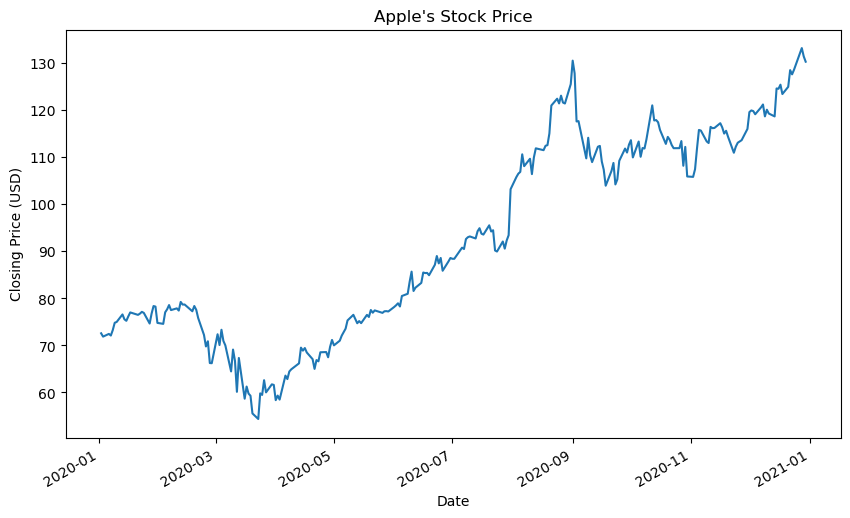

In [8]:
# Plots
apple_df['Close'].plot(figsize=(10, 6), title="Apple's Stock Price")
plt.xlabel('Date')
plt.ylabel('Closing Price (USD)')
plt.show()

In [9]:
# Fetching Multiple Stocks
multi_data = yf.download(["AAPL", "MSFT"], start="2020-01-01", end="2021-01-01")
multi_data.head()

C:\Users\bell\AppData\Local\Temp\ipykernel_14376\3515432545.py:2: FutureWarning: YF.download() has changed argument auto_adjust default to True
  multi_data = yf.download(["AAPL", "MSFT"], start="2020-01-01", end="2021-01-01")
[*********************100%***********************]  2 of 2 completed


Price           Close                   High                    Low  \
Ticker           AAPL        MSFT       AAPL        MSFT       AAPL   
Date                                                                  
2020-01-02  72.538506  152.791092  72.598884  152.895731  71.292296   
2020-01-03  71.833275  150.888626  72.594040  152.153802  71.608669   
2020-01-06  72.405670  151.278656  72.444313  151.345251  70.703005   
2020-01-07  72.065147  149.899338  72.671341  151.887465  71.845369   
2020-01-08  73.224419  152.286957  73.526310  152.962357  71.768094   

Price                        Open                 Volume            
Ticker            MSFT       AAPL        MSFT       AAPL      MSFT  
Date                                                                
2020-01-02  150.612717  71.545882  151.040780  135480400  22622100  
2020-01-03  150.355924  71.765651  150.603260  146322800  21116200  
2020-01-06  148.881480  70.954181  149.423705  118387200  20813700  
2020-01-07  149.652016  72.415337  151.554533  108872000  21634100  
2020-01-08  150.251264  71.768094  151.183494  132079200  27746500

In [10]:
# Interval-based Data Retrieval
# Valid intervals: [1m, 2m, 5m, 15m, 30m, 60m, 90m, 1h, 1d, 5d, 1wk, 1mo, 3mo]')
# Note: minutes and horly data have a time limit!
apple_weekly = yf.download("AAPL", start="2020-01-01", end="2021-01-01", interval="1wk")
apple_weekly.head(10)

C:\Users\bell\AppData\Local\Temp\ipykernel_14376\2236710235.py:4: FutureWarning: YF.download() has changed argument auto_adjust default to True
  apple_weekly = yf.download("AAPL", start="2020-01-01", end="2021-01-01", interval="1wk")
[*********************100%***********************]  1 of 1 completed


Price,Close,High,Low,Open,Volume
Ticker,AAPL,AAPL,AAPL,AAPL,AAPL
Date,,,,,
2020-01-01,72.065155,72.671348,70.703017,71.545896,509062400
2020-01-08,75.516373,76.697376,71.768089,71.768089,726318800
2020-01-15,76.455841,77.047544,74.760414,75.315898,479412400
2020-01-22,76.726341,78.088472,73.632557,76.941284,677016000
2020-01-29,77.006508,79.180127,72.990141,78.358984,852965600
2020-02-05,77.190041,78.544934,75.798929,78.134358,545608400
2020-02-12,77.225578,79.215529,76.162815,77.823532,441122800
2020-02-19,69.740265,78.593369,69.268201,77.467668,776972800


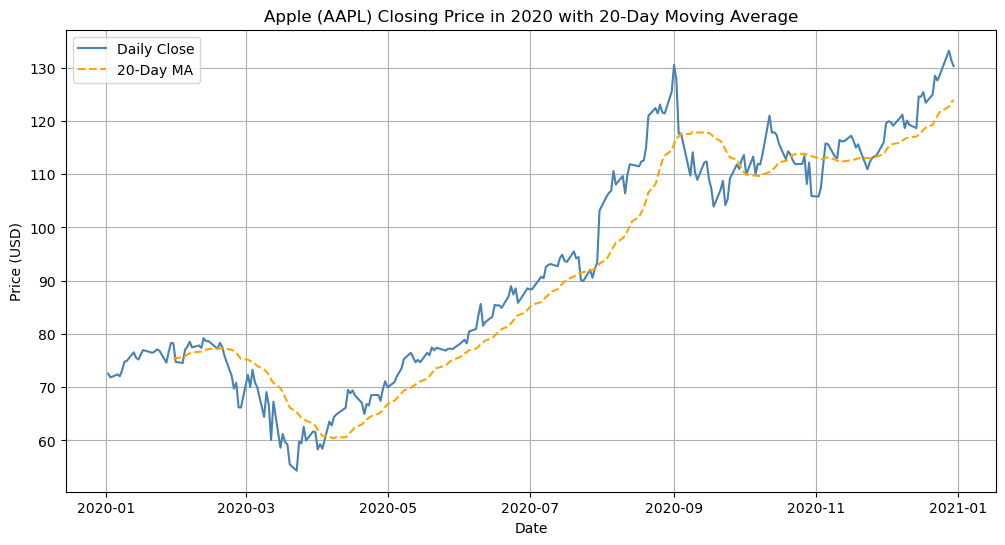

In [11]:
# Adding Moving Average indicators
apple = yf.Ticker("AAPL")
apple_df = apple.history(start='2020-01-01', end='2020-12-31')

# Add a 20-day moving average
apple_df['MA20'] = apple_df['Close'].rolling(window=20).mean()

# Plot
plt.figure(figsize=(12, 6))
plt.plot(apple_df['Close'], label='Daily Close', color='steelblue')
plt.plot(apple_df['MA20'], label='20-Day MA', color='orange', linestyle='--')
plt.title("Apple (AAPL) Closing Price in 2020 with 20-Day Moving Average")
plt.xlabel("Date")
plt.ylabel("Price (USD)")
plt.legend()
plt.grid(True)
plt.show()

#### Interpretation:
- The **closing price** curve shows Apple’s performance across 2020.
- The **20-day moving average** smooths short-term fluctuations and highlights medium-term trends.
- This type of analysis is commonly used in **technical analysis** and **trading strategy development**. But, could be used in regression analysis as well!

### Load MICROSOFT (MSFT) stock prices.

In [12]:
ticker = 'MSFT'
msft = yf.Ticker(ticker)
df = msft.history(start = "2010-12-31", interval= "1d")
df.head()

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2010-12-31 00:00:00-05:00,21.248347,21.340068,21.118412,21.332424,24752000,0.0,0.0
2011-01-03 00:00:00-05:00,21.439426,21.538790,21.340064,21.385923,53443800,0.0,0.0
2011-01-04 00:00:00-05:00,21.355354,21.531149,21.286564,21.470003,54405600,0.0,0.0
2011-01-05 00:00:00-05:00,21.324776,21.408852,21.225414,21.401209,58998700,0.0,0.0
2011-01-06 00:00:00-05:00,21.431790,22.050896,21.294210,22.027966,88026300,0.0,0.0


In [13]:
# First 6 and 6 entries
df.head(6)

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2010-12-31 00:00:00-05:00,21.248347,21.340068,21.118412,21.332424,24752000,0.0,0.0
2011-01-03 00:00:00-05:00,21.439426,21.538790,21.340064,21.385923,53443800,0.0,0.0
2011-01-04 00:00:00-05:00,21.355354,21.531149,21.286564,21.470003,54405600,0.0,0.0
2011-01-05 00:00:00-05:00,21.324776,21.408852,21.225414,21.401209,58998700,0.0,0.0
2011-01-06 00:00:00-05:00,21.431790,22.050896,21.294210,22.027966,88026300,0.0,0.0
2011-01-07 00:00:00-05:00,21.890388,21.966821,21.592300,21.859816,73762000,0.0,0.0


In [14]:
df.tail(6)

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2025-08-14 00:00:00-04:00,521.702383,525.086834,519.286372,521.622498,20269100,0.00,0.0
2025-08-15 00:00:00-04:00,521.912054,525.236545,518.228107,519.316284,25213300,0.00,0.0
2025-08-18 00:00:00-04:00,520.733964,521.961925,513.176381,516.251282,23760600,0.00,0.0
2025-08-19 00:00:00-04:00,514.154777,514.314488,507.715351,508.933350,21481000,0.00,0.0
2025-08-20 00:00:00-04:00,509.033198,510.161348,503.612117,504.890015,27723000,0.00,0.0
2025-08-21 00:00:00-04:00,503.690002,507.630005,502.720001,504.239990,18418400,0.83,0.0


In [15]:
df.describe()

,Open,High,Low,Close,Volume,Dividends,Stock Splits
count,3682.000000,3682.000000,3682.000000,3682.000000,3.682000e+03,3682.000000,3682.0
mean,149.963085,151.375092,148.498563,150.005876,3.372067e+07,0.007300,0.0
std,137.725054,138.942686,136.431578,137.737170,1.896045e+07,0.062364,0.0
min,18.379801,18.581010,18.302412,18.348839,7.164500e+06,0.000000,0.0
25%,36.083454,36.528005,35.790717,36.198948,2.173950e+07,0.000000,0.0
50%,88.684618,89.277109,87.231132,88.254944,2.855110e+07,0.000000,0.0
75%,250.860787,253.464711,247.984149,251.197445,3.987905e+07,0.000000,0.0
max,554.318706,554.538376,531.027040,534.760925,3.193179e+08,0.830000,0.0


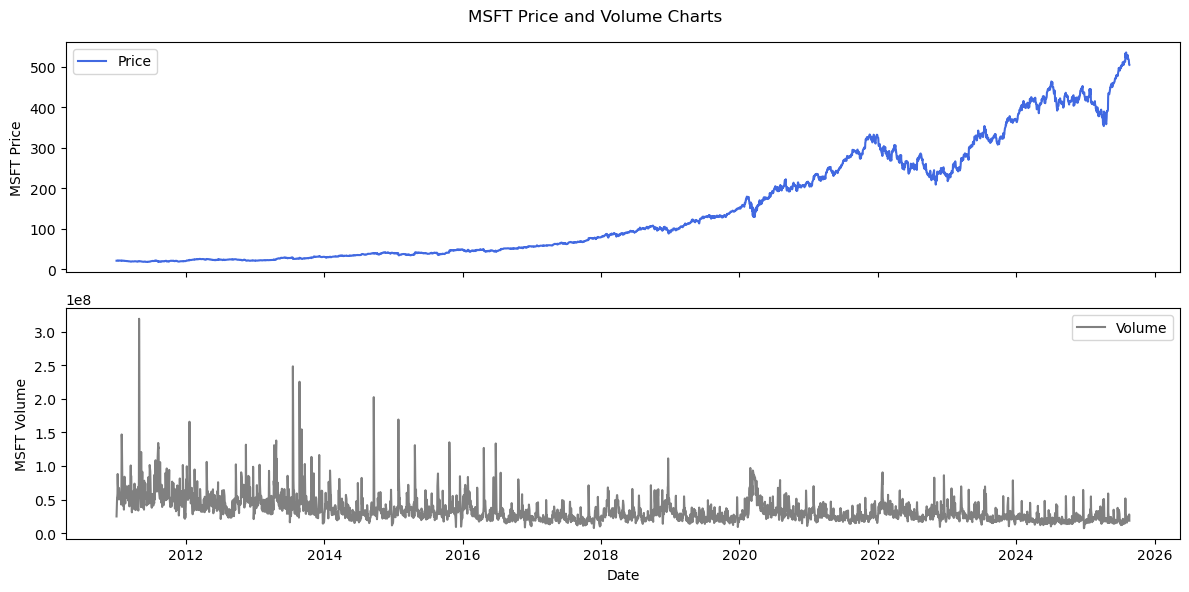

In [16]:
# Plot
fig, axs = plt.subplots(2, figsize=(12, 6), sharex=True)
fig.suptitle(f"{ticker} Price and Volume Charts")
axs[0].plot(df.index, df['Close'], label='Price', color='royalblue')
axs[0].set_ylabel('MSFT Price')
axs[0].legend()
axs[1].plot(df.index, df['Volume'], label='Volume', color='gray')
axs[1].set_ylabel('MSFT Volume')
axs[1].legend()
plt.xlabel('Date')
plt.tight_layout()
plt.show()

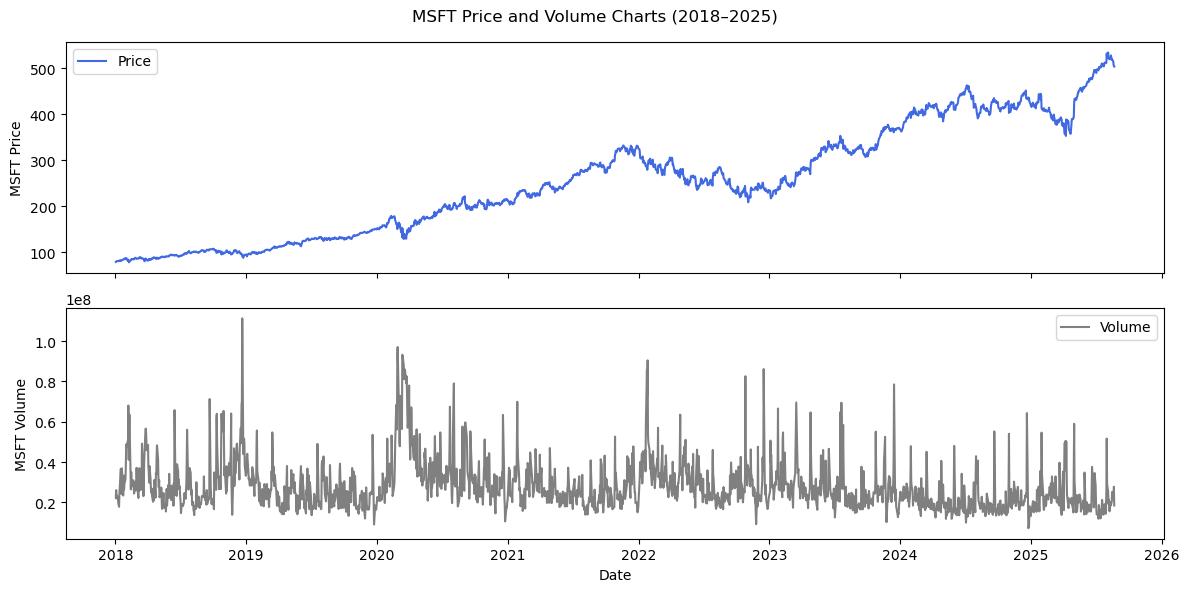

In [17]:
# Filter data from 2018 onwards
df_filtered = df[df.index >= "2018-01-01"]

# Plot price and volume
fig, axs = plt.subplots(2, figsize=(12, 6), sharex=True)
fig.suptitle(f"{ticker} Price and Volume Charts (2018–2025)")
axs[0].plot(df_filtered.index, df_filtered['Close'], label='Price', color='royalblue')
axs[0].set_ylabel('MSFT Price')
axs[0].legend()
axs[1].plot(df_filtered.index, df_filtered['Volume'], label='Volume', color='gray')
axs[1].set_ylabel('MSFT Volume')
axs[1].legend()
plt.xlabel('Date')
plt.tight_layout()
plt.show()

C:\Users\bell\AppData\Local\Temp\ipykernel_14376\958392976.py:8: FutureWarning: YF.download() has changed argument auto_adjust default to True
  vix = yf.download("^VIX", start="2018-01-01", end="2025-02-28")
[*********************100%***********************]  1 of 1 completed


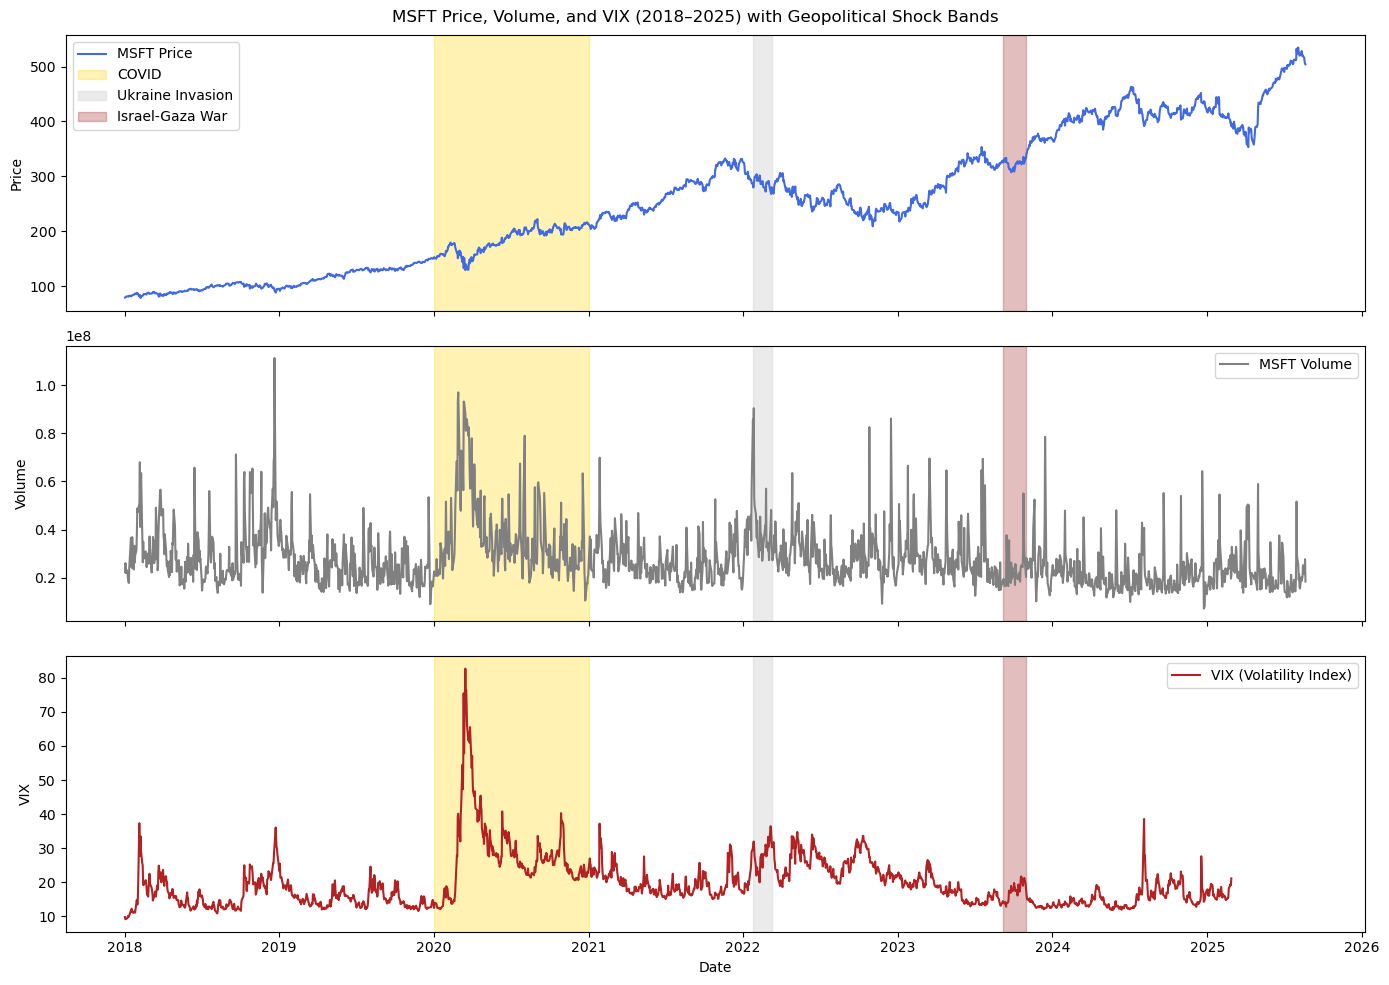

In [18]:
event_bands = [
    ("2020-01-01", '2021-01-01', 'COVID'),
    ("2022-01-24", "2022-03-10", "Ukraine Invasion"),
    ("2023-09-07", "2023-11-01", "Israel-Gaza War")
]

# Download VIX (CBOE volatility index)
vix = yf.download("^VIX", start="2018-01-01", end="2025-02-28")

# Plot MSFT price, volume, and VIX
fig, axs = plt.subplots(3, figsize=(14, 10), sharex=True)
fig.suptitle("MSFT Price, Volume, and VIX (2018–2025) with Geopolitical Shock Bands")

# Price plot
axs[0].plot(df_filtered.index, df_filtered['Close'], label='MSFT Price', color='royalblue')
axs[0].set_ylabel('Price')
axs[0].legend()

# Volume plot
axs[1].plot(df_filtered.index, df_filtered['Volume'], label='MSFT Volume', color='gray')
axs[1].set_ylabel('Volume')
axs[1].legend()

# VIX plot
axs[2].plot(vix.index, vix['Close'], label='VIX (Volatility Index)', color='firebrick')
axs[2].set_ylabel('VIX')
axs[2].legend()
axs[2].set_xlabel('Date')

# Highlight events with distinct colors
colorv = ['gold', 'silver', 'brown']
for i, (start, end, label) in enumerate(event_bands):
    for ax in axs:
        ax.axvspan(pd.to_datetime(start), pd.to_datetime(end), color=colorv[i % len(colorv)], alpha=0.3, label=label)

# Remove duplicate labels in legend
handles, labels = axs[0].get_legend_handles_labels()
unique = dict(zip(labels, handles))
axs[0].legend(unique.values(), unique.keys())

plt.tight_layout()
plt.show()

### Generate Scatter for Volume and Prices

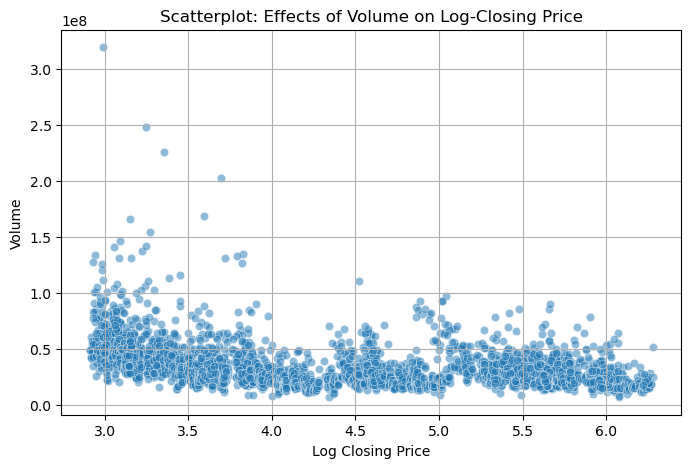

In [19]:
import seaborn as sns
# Scatterplot: Volume vs Log(Price)
plt.figure(figsize=(8, 5))
sns.scatterplot(y=df['Volume'], x=np.log(df['Close']), alpha=0.5)
plt.title('Scatterplot: Effects of Volume on Log-Closing Price')
plt.ylabel('Volume')
plt.xlabel('Log Closing Price')
plt.grid(True)
plt.show()

In [20]:
correlation = np.corrcoef(df['Volume'], np.log(df['Close']))[0, 1]
print(f"Correlation between Log(Close) and Volume: {correlation:.2f}")

Correlation between Log(Close) and Volume: -0.44


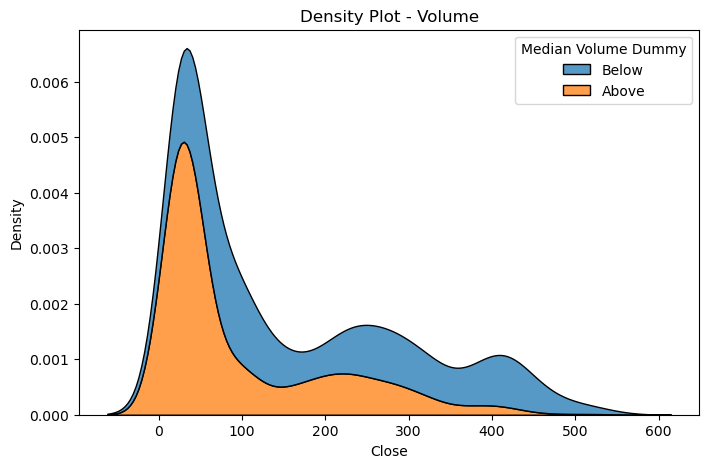

In [21]:
## Volume by below/above Median
# 1. Create a dummy
df['Median Volume Dummy'] = np.where(df['Volume'] >= df['Volume'].median(), 'Above', 'Below')
# 2. Plot
plt.figure(figsize=(8, 5))
sns.kdeplot(data=df, x="Close", hue='Median Volume Dummy', multiple="stack")
plt.title('Density Plot - Volume');

From this descriptive analysis, how important would you say is the influence of trading volume on stock price?

### Estimate the parameters in the following TLR model:

$log(Close_t) = \beta_0 + \beta_1 Volume_t + \beta_2 trend_t + u_t$  

In [22]:
# Let's create a trend variable
df['trend'] = np.arange(1,len(df)+1)
df['trend']

Date
2010-12-31 00:00:00-05:00       1
2011-01-03 00:00:00-05:00       2
2011-01-04 00:00:00-05:00       3
2011-01-05 00:00:00-05:00       4
2011-01-06 00:00:00-05:00       5
                             ... 
2025-08-15 00:00:00-04:00    3678
2025-08-18 00:00:00-04:00    3679
2025-08-19 00:00:00-04:00    3680
2025-08-20 00:00:00-04:00    3681
2025-08-21 00:00:00-04:00    3682
Name: trend, Length: 3682, dtype: int64

In [23]:
# Model
y = np.log(df['Close'])
X = sm.add_constant(df['Volume'])
mdl1 = sm.OLS(y, X).fit()
mdl1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Close   R-squared:                       0.193
Model:                            OLS   Adj. R-squared:                  0.192
Method:                 Least Squares   F-statistic:                     877.7
Date:                Fri, 22 Aug 2025   Prob (F-statistic):          3.52e-173
Time:                        10:07:53   Log-Likelihood:                -4989.9
No. Observations:                3682   AIC:                             9984.
Df Residuals:                    3680   BIC:                             9996.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          5.3307      0.032    168.902      0.000       5.269       5.393
Volume     -2.417e-08   8.16e-10    -29.626      0.000   -2.58e-08   -2.26e-08
==============================================================================
Omnibus:                      700.391   Durbin-Watson:                   0.178
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              172.573
Skew:                           0.227   Prob(JB):                     3.36e-38
Kurtosis:                       2.041   Cond. No.                     7.89e+07
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 7.89e+07. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

### Conduct t-test statistics

In [24]:
from scipy import stats
coef_volume = mdl1.params['Volume']
se_volume = mdl1.bse['Volume']
check_p = mdl1.pvalues.loc['Volume']

# Compute t-value
t_value = (coef_volume - 0) / se_volume
print(f"t-value: {t_value:.2f}")

# Compute critical value at 0.05 level
alpha = 0.05
cv = stats.t.ppf(1-alpha, df=mdl1.df_resid)
print(f"Critical Value for {alpha} confidence level: {cv:.2f}")

# Compute pvalue
p = (1 - stats.t.cdf(abs(t_value), df=mdl1.df_resid))
print(f"p-value: {p:.10f}")
print(f"p-value: {check_p:.10f}")

t-value: -29.63
Critical Value for 0.05 confidence level: 1.65
p-value: 0.0000000000
p-value: 0.0000000000


### Confidence Intervals

In [25]:
# 90% confidence interval
conf_int = mdl1.conf_int(alpha=0.10) 
print("90% Confidence Interval for volume coefficient:")
print(conf_int)

90% Confidence Interval for volume coefficient:
                   0             1
const   5.278776e+00  5.382628e+00
Volume -2.551267e-08 -2.282806e-08


In [26]:
conf_int.loc['Volume'].items

<bound method Series.items of 0   -2.551267e-08
1   -2.282806e-08
Name: Volume, dtype: float64>

In [27]:
print("CIs for Volume: \n", conf_int.loc['Volume'].values)

CIs for Volume: 
 [-2.55126725e-08 -2.28280628e-08]


**Note:**    
95% of the so computed CIs would contain the true population parameters.

We are 90% confident that the true value of β1, the coefficient for Volume, lies between −2.4e-08 and −2.13e-08. We could also say, with 90% confidence, that an increase of one unit in the Volume is associated with a (%) decrease in the Close price by between the interval values.

NB: if the confidence interval does not include zero, it's telling us that the effect of the covariate is statistically significant at the 90% confidence level.